<a href="https://colab.research.google.com/github/HaripriyaVennam/Neural-Networks-and-Deep-Learning/blob/main/Week6/ICP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Define the CNN model
model = models.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))  # Explicitly define input shape

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))  # Adjust padding to avoid negative dimension

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

# Fully connected layers
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy after applying all modifications: {test_acc:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 206s 257ms/step - accuracy: 0.2321 - loss: 2.0183 - val_accuracy: 0.4426 - val_loss: 1.5090
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 190s 242ms/step - accuracy: 0.4739 - loss: 1.4478 - val_accuracy: 0.5262 - val_loss: 1.3013
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 188s 240ms/step - accuracy: 0.5385 - loss: 1.2655 - val_accuracy: 0.5952 - val_loss: 1.1349
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 240ms/step - accuracy: 0.5971 - loss: 1.1354 - val_accuracy: 0.6183 - val_loss: 1.0753
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 190s 243ms/step - accuracy: 0.6276 - loss: 1.0488 - val_accuracy: 0.6188 - val_loss: 1.1132
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 205s 246ms/step - accuracy: 0.6480 - loss: 0.9887 - val_accuracy: 0.6751 - val_loss: 0.9408
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 247ms/step - accuracy: 0.6820 - loss: 0.9087 - val_accuracy: 0.6884 - val_loss: 0.8958
Epoch 8/10
782/782 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


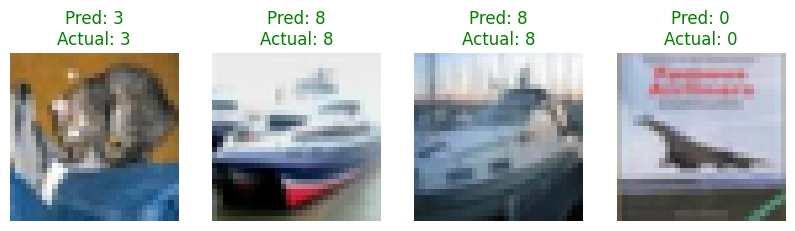

Image 1: Predicted = 3, Actual = 3
✔ Correct Prediction
Image 2: Predicted = 8, Actual = 8
✔ Correct Prediction
Image 3: Predicted = 8, Actual = 8
✔ Correct Prediction
Image 4: Predicted = 0, Actual = 0
✔ Correct Prediction


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the first 4 images in the test set
predictions = model.predict(x_test[:4])

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get actual labels
actual_labels = np.argmax(y_test[:4], axis=1)

# Display the images with predicted and actual labels
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

for i, ax in enumerate(axes):
    ax.imshow(x_test[i])  # Show the image
    ax.axis('off')  # Hide the axis
    ax.set_title(f"Pred: {predicted_labels[i]}\nActual: {actual_labels[i]}",
                 color="green" if predicted_labels[i] == actual_labels[i] else "red")

plt.show()

# Print results for verification
for i in range(4):
    print(f"Image {i+1}: Predicted = {predicted_labels[i]}, Actual = {actual_labels[i]}")
    if predicted_labels[i] == actual_labels[i]:
        print("✔ Correct Prediction")
    else:
        print("✘ Incorrect Prediction")


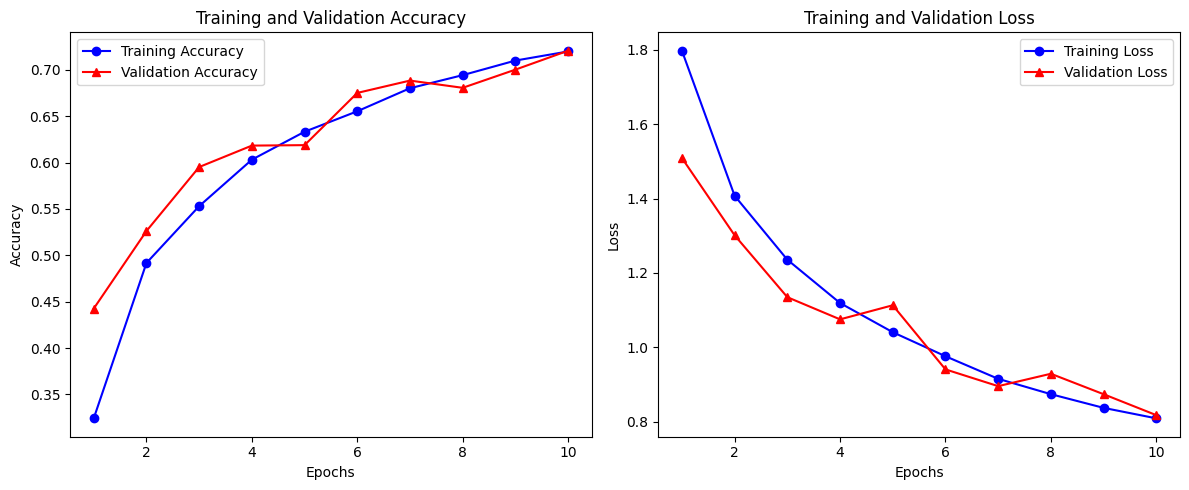

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Create subplot (1 row, 2 columns, 1st plot)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')  # 'bo-' means blue circles
plt.plot(epochs, val_accuracy, 'r^-', label='Validation Accuracy')  # 'r^-' means red triangles
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)  # Create subplot (1 row, 2 columns, 2nd plot)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # Adjust layout for better readability
plt.show()


https://drive.google.com/file/d/1G8zsReDog2HmUKEZll0nqmxW7ETF6zG0/view?usp=drive_link